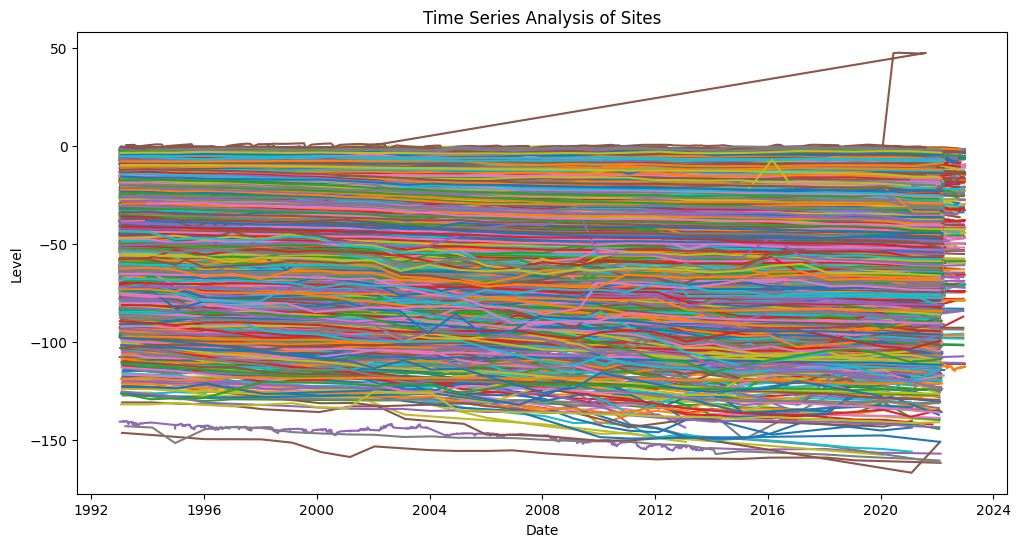

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
csv_file = 'Data Subset.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file)

# Step 2: Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Step 3: Set the 'date' column as the index
df.set_index('date', inplace=True)

# Step 4: Plot the time series for each site
sites = df['site'].unique()
plt.figure(figsize=(12, 6))

for site in sites:
    site_data = df[df['site'] == site]
    plt.plot(site_data.index, site_data['level'], label=f'Site {site}')

plt.xlabel('Date')
plt.ylabel('Level')
plt.title('Time Series Analysis of Sites')
# plt.legend()
plt.show()

# Step 5: Conduct further time series analysis here (e.g., linear regression, seasonal decomposition, etc.)
# For example, you can use the statsmodels library for advanced analysis.
# For simple linear regression, you can refer to previous examples in this conversation.


                            OLS Regression Results                            
Dep. Variable:                  level   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 26 Jul 2023   Prob (F-statistic):                nan
Time:                        16:18:40   Log-Likelihood:            -1.9089e+06
No. Observations:              409773   AIC:                         3.818e+06
Df Residuals:                  409772   BIC:                         3.818e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            -23.4632      0.040   -588.577      0.0

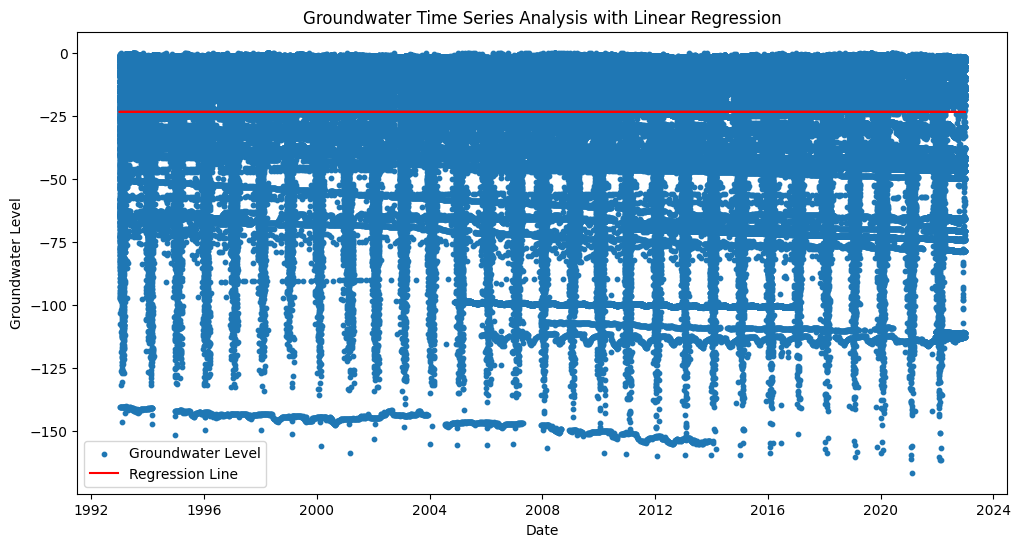

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
csv_file = 'Data Subset.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file)

# Step 2: Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Step 3: Set the 'date' column as the index
df.set_index('date', inplace=True)

# Step 4: Remove sites with positive values
df = df[df['level'] <= 0]

# Step 5: Conduct linear regression on the remaining data
X = sm.add_constant(pd.Series(1, index=df.index))  # Add a constant column of ones
y = df['level']  # Replace 'level' with the actual column name for the groundwater level

# Step 6: Perform the linear regression
model = sm.OLS(y, X).fit()

# Step 7: Get the regression results
print(model.summary())

# Step 8: Plot the graph
plt.figure(figsize=(12, 6))
plt.scatter(df.index, y, label='Groundwater Level', s=10)
plt.plot(df.index, model.fittedvalues, color='red', label='Regression Line')
plt.xlabel('Date')
plt.ylabel('Groundwater Level')
plt.title('Groundwater Time Series Analysis with Linear Regression')
plt.legend()
plt.show()
